In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import preprocessing
import seaborn as sns


### Import Data

In [3]:
path = "C:\\Users\\HannahNevel\\Downloads\\archive\\Lead Scoring.csv"
lead_data = pd.read_csv(path, delimiter=",")
lead_data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
lead_data.drop(columns =['What matters most to you in choosing a course', 'Magazine','Newspaper Article','X Education Forums','Newspaper',\
    'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Asymmetrique Activity Index',\
        'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Specialization', 'Search', 'Lead Profile', 'Lead Quality', 'Tags', 'Last Notable Activity']\
            , inplace = True)


In [5]:
lead_data.rename(columns = {'Total Time Spent on Website':'Total Time Spent on Website (min)'}, inplace = True)
lead_data['Total Time Spent on Website (min)'] = lead_data['Total Time Spent on Website (min)'].div(60)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
lead_sources = np.unique(lead_data['Lead Source'].astype(str))

In [8]:
col_headers = lead_data.columns.values
X = lead_data[col_headers].values
lead_origins = np.unique(lead_data['Lead Origin'])
DoNotEmails = np.unique(lead_data['Do Not Email'])
DoNotCalls = np.unique(lead_data['Do Not Call'])
Countries = np.unique(lead_data['Country'].astype(str))
Cities = np.unique(lead_data['City'].astype(str))
Occupations = np.unique(lead_data['What is your current occupation'].astype(str))
heard_abouts = np.unique(lead_data['How did you hear about X Education'].astype(str))

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)



In [11]:
lead_data.dtypes

Prospect ID                            object
Lead Number                             int64
Lead Origin                            object
Lead Source                            object
Do Not Email                           object
Do Not Call                            object
Converted                               int64
TotalVisits                           float64
Total Time Spent on Website (min)     float64
Page Views Per Visit                  float64
Last Activity                          object
Country                                object
How did you hear about X Education     object
What is your current occupation        object
City                                   object
dtype: object

In [12]:
encoded_lead_data = MultiColumnLabelEncoder(columns = ['Lead Origin','Lead Source','Do Not Email', 'Do Not Call','Last Activity','Country',\
    'How did you hear about X Education','What is your current occupation','City']).fit_transform(lead_data)

In [13]:
encoded_lead_data.corr()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website (min),Page Views Per Visit,Last Activity,Country,How did you hear about X Education,What is your current occupation,City
Lead Number,1.000000,0.004194,0.075424,-0.098529,0.011913,0.025157,0.022223,0.020329,0.058808,-0.074901,-0.034653,-0.012940,0.049471,0.034514
Lead Origin,0.004194,1.000000,0.091317,0.053296,0.006909,0.223725,0.085354,0.088852,0.156455,0.108448,-0.049435,-0.261804,-0.182637,-0.474553
Lead Source,0.075424,0.091317,1.000000,-0.031846,0.010122,0.180602,-0.153861,-0.232634,-0.251645,0.117301,0.546770,0.040460,-0.015858,0.298633
Do Not Email,-0.098529,0.053296,-0.031846,1.000000,-0.004322,-0.135580,0.033842,-0.046374,0.033582,-0.038383,-0.034198,0.071147,0.034835,-0.032200
Do Not Call,0.011913,0.006909,0.010122,-0.004322,1.000000,0.018581,0.003221,0.006801,-0.005918,-0.003161,0.007141,-0.017383,-0.009691,-0.016109
Converted,0.025157,0.223725,0.180602,-0.135580,0.018581,1.000000,0.030395,0.362483,-0.003328,0.247075,0.056235,-0.222737,-0.231565,-0.130458
TotalVisits,0.022223,0.085354,-0.153861,0.033842,0.003221,0.030395,1.000000,0.221240,0.512125,0.059777,-0.379762,-0.109188,-0.049249,-0.226078
Total Time Spent on Website (min),0.020329,0.088852,-0.232634,-0.046374,0.006801,0.362483,0.221240,1.000000,0.320361,0.086314,-0.427406,-0.164641,-0.119172,-0.237923
Page Views Per Visit,0.058808,0.156455,-0.251645,0.033582,-0.005918,-0.003328,0.512125,0.320361,1.000000,0.062049,-0.586074,-0.167852,-0.071616,-0.345651
Last Activity,-0.074901,0.108448,0.117301,-0.038383,-0.003161,0.247075,0.059777,0.086314,0.062049,1.000000,0.086323,-0.064634,-0.042727,-0.012242


In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Conversion Rate')

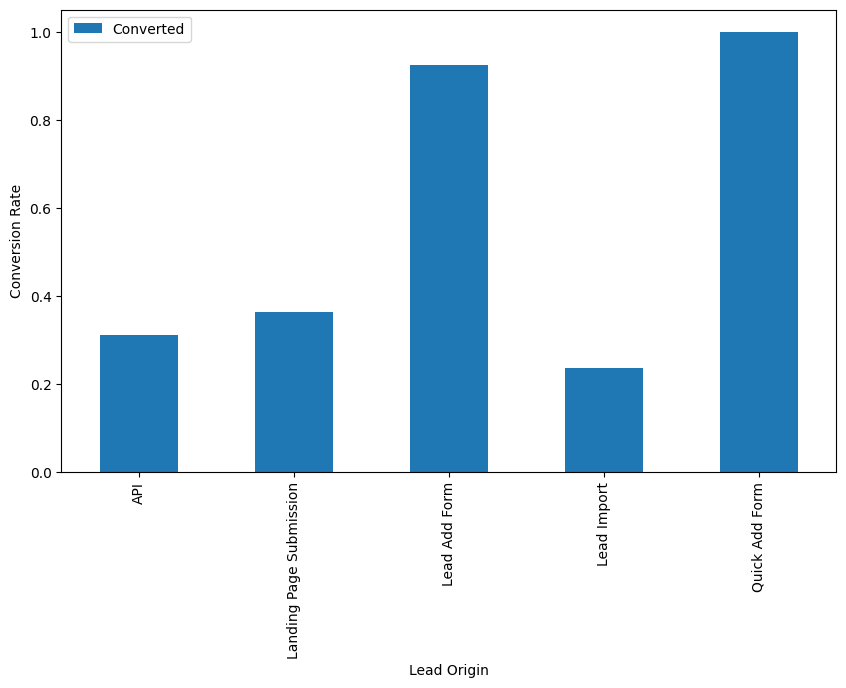

In [22]:
LeadOrigin_group = lead_data[['Lead Origin','Converted']]
LeadOrigin_group = LeadOrigin_group.groupby(['Lead Origin'],as_index=False).mean()

LeadOrigin_group.plot(kind='bar', x = 'Lead Origin', figsize=(10, 6))

plt.xlabel('Lead Origin')
plt.ylabel('Conversion Rate') 

Text(0, 0.5, 'Conversion Rate')

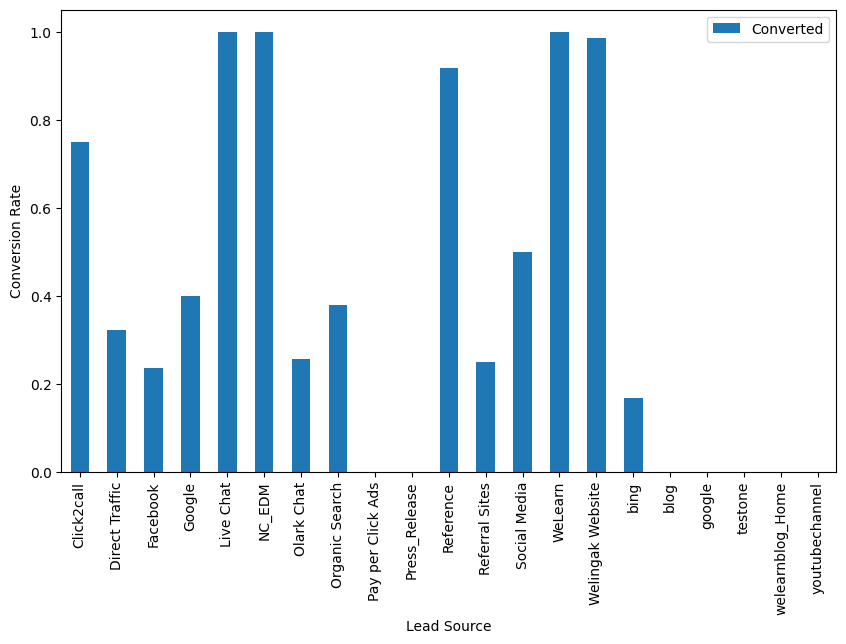

In [23]:
LeadSource_group = lead_data[['Lead Source','Converted']]
LeadSource_group = LeadSource_group.groupby(['Lead Source'],as_index=False).mean()

LeadSource_group.plot(kind='bar', x = 'Lead Source', figsize=(10, 6))

plt.xlabel('Lead Source')
plt.ylabel('Conversion Rate') 

<AxesSubplot:xlabel='Total Time Spent on Website (min)', ylabel='Last Activity'>

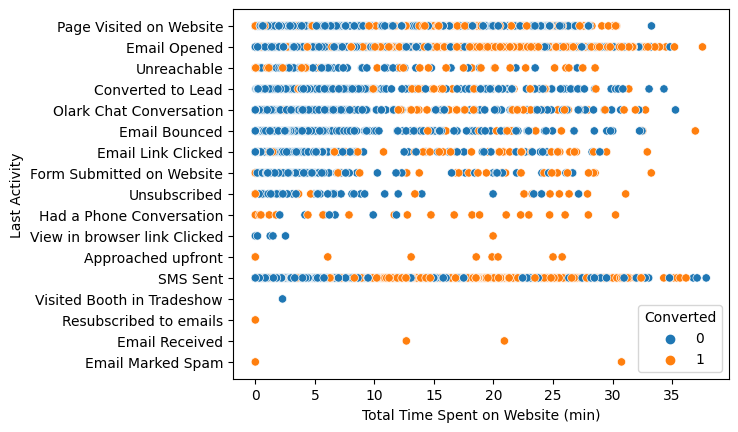

In [26]:
sns.scatterplot(data=lead_data, y='Last Activity',x='Total Time Spent on Website (min)',hue='Converted')